<a href="https://colab.research.google.com/github/cherlimSG/ML/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import sklearn.linear_model as skl_lm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Upload a file: Auto.csv

In [ ]:
#from google.colab import files
#uploaded = files.upload()

Saving Auto.csv to Auto (1).csv


# Part 1: Data preparation

In [ ]:
url = 'https://raw.githubusercontent.com/cherlim/NP/main/Auto.csv'
auto_df = pd.read_csv(url)
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


There are a few ``?`` in ``horsepower`` column. We can easily check by

- comparing that column with ``?`` (the results are True/False)

- summing the result 

In [ ]:
print('Number of ? in horsepower = ', sum(auto_df['horsepower']=='?'))

Number of ? in horsepower =  5


We can drop rows that have ``?``. The below line overwrites ``auto_df``

In [ ]:
auto_df = pd.read_csv(url, na_values = '?').dropna()

This line is very useful to give overview of a data frame.

In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


Extract the target (``mpg`` column) and the variable (``horsepower``).

In [ ]:
X = auto_df['horsepower']
y = auto_df['mpg']

If we want more columns for X, do you know how to extract the columns?
Example below extract data from column 2 to 5

In [ ]:
Xcols = auto_df.iloc[:, 2:6]
Xcols

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5
...,...,...,...,...
392,140.0,86.0,2790,15.6
393,97.0,52.0,2130,24.6
394,135.0,84.0,2295,11.6
395,120.0,79.0,2625,18.6


Let's print out ``X`` and ``y``.

In [ ]:
# Print out the first 5 rows of X and y

print(X.head)
print(y.head)

print(type(X), type(y))

<bound method NDFrame.head of 0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
392     86.0
393     52.0
394     84.0
395     79.0
396     82.0
Name: horsepower, Length: 392, dtype: float64>
<bound method NDFrame.head of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
392    27.0
393    44.0
394    32.0
395    28.0
396    31.0
Name: mpg, Length: 392, dtype: float64>
<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [ ]:
# Print out the size or shape of X and y

print(X.shape)
print(y.shape)

(392,)
(392,)


### What is the number of rows and columns for our features and target?

Answer: X: 392 rows, 1 column; Y: 392 rows, 1 column

### Reshape X

We have to reshape X because X is single row or 1 rows by m columns. LinearRegression( ) needs X to be in n rows by m column.

This is because we have chosen only the column "horsepower" for our X features.
If we have chose more, we do not need to reshape

In [ ]:
X = X.values
print(type(X))
X = X.reshape(-1,1)
print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X[0:5])

[[130.]
 [165.]
 [150.]
 [150.]
 [140.]]


In [ ]:
X.shape


(392, 1)

In [ ]:
type(X)

numpy.ndarray

# What did we just do?
1. Originally, X is a dataframe = df['horsepower']
2. Then, we extract the values of X using X.values and then assign it back to X. This made X into a one-dimension array of 1 row only.
3. Then, we need to reshape it to an array of n rows by m columns using reshape. Dimension of X is now 392x1.
4. X is now a 392x1 array.

# Why do it?
1. Although sklearn "train-test-split" takes inputs such as np array, pd df etc., when the input X consists of just one feature like the case above, this module only accepts X in a nxm format. 
2. Therefore, we MUST change X from a dataframe to a 1-D array, then reshape it into a nxm array before pumping into the "train-test-split" module.

## Part 2: Train Test Split

In [ ]:
# Train, Test Split the data
# By default the data will be split into 0.75: 0.25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 10)

## Part 3: Fit your Model

## Linear Regression
 We will do a simple Linear Regression fit and compute the MSE score

In [ ]:
# Fit a Linear Regression and print out the intercept and coefficient
# Also print out the MSE, RMSE, R2 score on the test set

my_LR = LinearRegression()
my_LR.fit(X_train, y_train)

print("Result of Linear regression\n")
print("Intercept = {}\n".format(my_LR.intercept_))
print("Coefficients = {}\n".format(my_LR.coef_))

y_predict = my_LR.predict(X_test)

MSE_test = mean_squared_error(y_test, y_predict)
RMSE_test = np.sqrt(MSE_test)

R2_score = my_LR.score(X_test, y_test)

print("MSE on the test set: {:.3f}".format(MSE_test))
print("RMSE on the test set: {:.3f}".format(RMSE_test))
print("R2 score on the test set: {:.3f}".format(R2_score))



Result of Linear regression

Intercept = 40.61286169928138

Coefficients = [-0.16090075]

MSE on the test set: 22.892
RMSE on the test set: 4.785
R2 score on the test set: 0.596


## We will now do another evaluation on the MSE score by using LeaveOneOut and KFold Cross Validation

We will compute for Leave One Out

In [ ]:
# For loocv, first determine the number of training data we have
from sklearn.model_selection import LeaveOneOut

cv = LeaveOneOut()
MSE_LOOCV = cross_val_score(my_LR, X_train, y_train, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)

print("LOOCV MSE score: {:.3f}".format(np.mean(np.abs(MSE_LOOCV))))



LOOCV MSE score: 25.047


In [ ]:
#MSE_LOOCV is an array of length 274. Each value is the result of one cv computation. 
# Hence, the overall MSE score should be the average of the entire array (absolute values)
print(MSE_LOOCV.shape)
print(type(MSE_LOOCV))

(274,)
<class 'numpy.ndarray'>


In [ ]:
# Now print out the KFold score for KFold = 5
cv = KFold(n_splits=5, random_state=1, shuffle=True)
MSE_KFold = cross_val_score(my_LR, X_train, y_train, scoring = "neg_mean_squared_error", cv = cv, n_jobs = 1)

print("KFold MSE score: {:.3f}".format(np.mean(np.abs(MSE_KFold))))




KFold MSE score: 25.070


## Part 4: Evaluate your model

Now compare the MSE value, the loocv score and KFold score for 5 folds all using simple LR model.

What is your comments?
1. Simple LR MSE = 22.9
2. LOOCV MSE = 25.05
3. KFold@5 MSE = 25.08

Simple LR has the best performance for now.




# Exercise: Let's try out polynomial regression and apply KFold to the model.

Besides MSE, KFold offers another way for us to evaluate our model.

We will now re-evaluate our result by choosing another model - Polynomial regression (order 2)

In [ ]:
# Codes for Fitting a Polynomial Regression Order 2

poly = PolynomialFeatures(degree = 2, include_bias = False)
# Transform X_train and X_test
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

# You may want to print out X_train_poly to confirm that we now have 2 columns


In [ ]:
# Define a LinearRegression model
my_model = LinearRegression()
  
# Train the model
my_model.fit(X_train_poly, y_train)

y_predict = my_model.predict(X_test_poly)

MSE_score = mean_squared_error(y_test, y_predict)

In [ ]:
# We will now write codes for KFold with 5 folds
MSE_KFold_poly = cross_val_score(my_model, X_train_poly, y_train, scoring = "neg_mean_squared_error", cv = cv , n_jobs = 1)

MSE_KFold_poly_score = np.mean(np.abs(MSE_KFold_poly)) 
print(MSE_KFold_poly_score)


21.015913603295616


## Again compare the 2 results. 

What is your comments?

KFold@5 MSE using Polynomial Regression (order=2) = 21.05 <- Best result so far.

## Part 5: Optimise your model

* We will now run the model for order 1 to 20
* We will compute both the MSE score as well as the KFold (5 folds) cross validation score
* We will plot a graph and determine which order will give the best score and choose our model for deployment

In [ ]:
# Setup arrays for storing our result. We have MSE_score and MSE_KFold_score to score
MSE_score = []
MSE_KFold_score = []
my_model = LinearRegression()

# We will also create n_array to store or polynomial order (for later plotting)
start = 1
stop =  7
n_array = np.linspace(start, stop, num=(stop-start+1), endpoint=True, dtype = int)


In [ ]:
# Now run a for loop to obtain MSE results for different polynomial orders

for n in n_array:
  poly = PolynomialFeatures(degree = n , include_bias = False)
  # Transform X_train and X_test
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test) 

  # Train the model
  my_model.fit(X_train_poly, y_train)

  # Compute MSE score
  y_predict = my_model.predict(X_test_poly)
  MSE_my_model = mean_squared_error(y_test, y_predict)
  MSE_score.append(MSE_my_model)

  # Compute MSE KFold CV Score
  MSE_KFold = cross_val_score(my_model, X_train_poly, y_train, scoring = "neg_mean_squared_error", cv = cv , n_jobs = 1)
  MSE_KFold_score.append(np.mean(np.abs(MSE_KFold)))


## Plot the results

We will plot it without fancy. You can touch up if you want to.

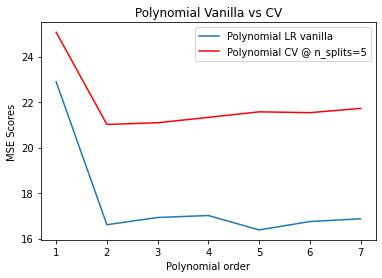

In [ ]:
import matplotlib.pyplot as plt
MSE_arr = np.array(MSE_score)
MSE_KFold_arr = np.array(MSE_KFold_score)

plt.plot(n_array, MSE_arr, label="Polynomial LR vanilla")
plt.plot(n_array, MSE_KFold_arr, 'r', label="Polynomial CV @ n_splits=5")
plt.title("Polynomial Vanilla vs CV")
plt.xlabel("Polynomial order")
plt.ylabel("MSE Scores")
plt.legend()
plt.show()

## Which order will you choose?

* Will you choose the order with the least MSE_score or MSE_KFold_score?

Ans: Both MSE curves show a dip at order = 2 and order = 11

* If you are to compromise, what will be your justifications?

Ans: Since the MSE scores do not differ too much at both orders, I will select order = 2 polynonmail (no CV) to reduce model complexity.


## More reading

[different options for scoring](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)

[cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score)

In [ ]:
def get_MSE_Poly(X_train, X_test, y_train, y_test, order):
  # Input:
  #       - X_train, X_test, y_train, y_test
  #       - order: order of polynomial regression

  # Define PolynomialFeatures() 
  poly = PolynomialFeatures(degree = order, include_bias = False)

  # Transform X_train and X_test
  X_train_poly = poly.fit_transform(X_train)
  X_test_poly = poly.fit_transform(X_test)

  # Define a LinearRegression model
  my_model = LinearRegression()
  
  # Train the model
  my_model.fit(X_train_poly, y_train)
  
  # Calculate the MSE on the test set
  return (mean_squared_error(y_test, my_model.predict(X_test_poly)))

# Have an array of polynomial orders and random states.

Declare an matrix to store results. Suppose you want to test with  20  random states, i.e.,  20  different splits, and you want to check  10  orders from  1  to  10 . The result matrix has the size of  20×10 .

In [ ]:
order_array = np.linspace(1, 10, 11, endpoint=True, dtype = int)
random_state_array = np.linspace(1, 20, 21, endpoint=True, dtype=int)

result_mat = np.zeros((random_state_array.size, order_array.size))



# Have two for loops nested togerther. The outer one is for random_state and the inner one is for the order.

In [ ]:
for i in range(0, random_state_array.size):
  for j in  range(0, order_array.size):
    random_state = i
    order = j+1

    # Split the data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = random_state)
    
    result_mat[i, j] = get_MSE_Poly(X_train, X_test, y_train, y_test, order)  
    #get_MSE_Poly(X_train, X_test, y_train, y_test, order)

# Plot the result

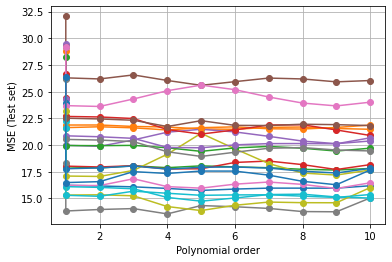

In [ ]:
plt.plot(order_array, result_mat.T, '-o')

plt.xlabel('Polynomial order')
plt.ylabel('MSE (Test set)')
plt.grid()
plt.show()

In [ ]:
print(result_mat.T) #Graph shows polynomial order=4 has the lowest MSE

[[22.50134465 28.8160267  22.64246971 24.37078287 24.3063052  32.06587371
  22.59688087 18.29277681 22.76322362 22.20809161 23.89939507 26.26020546
  28.20503115 26.70213054 29.49845585 29.21387394 29.13876085 26.22545415
  23.17573263 21.58800493 26.37782835]
 [16.23477565 21.87713663 17.97094617 18.02613092 19.97487671 26.29648979
  16.22612412 13.82435081 17.09794302 16.10607649 17.78033789 21.63350984
  19.95934918 22.6811541  20.86698636 22.51791654 23.69352238 20.52997124
  15.31622669 15.29629488 16.48556836]
 [16.16721169 21.88075223 17.85720359 17.94883718 19.88331466 26.19329005
  16.2089401  13.96572511 17.06112021 16.03623696 17.86037656 21.71382064
  19.943462   22.63222333 20.77822471 22.44599115 23.61566749 20.46861907
  15.34305212 15.20285696 16.57425914]
 [16.08773842 21.74229686 18.05901395 18.06438895 20.48049202 26.5697028
  16.84250055 14.04991116 17.62607822 15.90607087 18.03783563 21.61546471
  19.97139927 22.48671012 20.62963085 22.32392932 24.31543492 20.32745

# Leave-One-Out Cross-Validation
We wil use KFold() here to perform LOOCV.

In [ ]:
X_train = X.reshape(-1,1)
#y_train = y.reshape(-1,1)
n = y_train.size
print('n = ', n)

n =  294


In [ ]:
loocv = KFold(n_splits = n)
loocv.get_n_splits(X_train)

294

# loocv has a function loocv.split(X_train) which generates indices of train sets and test sets (for each split)italicized text

In [ ]:
print('Type of kf.split(X_train): ', type(loocv.split(X_train)))

Type of kf.split(X_train):  <class 'generator'>


# You now know a new type: generator. To get an item in this generator, use next().

The first item has indices of training samples. The second item has index of the test sample.

In [ ]:
print(next(loocv.split(X_train)))

(array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 1